# Compare CNprep Results (demonstration notebook)

Interactive notebook to compare CNprep results

### Set the sources

Make sure to setwd into the working directory with scripts and segtable data

In [4]:
#
# Load sources
#
setwd("~/Documents/Git-Projects/Git-Research-Projects/compare-cnprep-results/") # Set working directory to where the scripts are located at
source("compareCNprepResultsLibrary.R") # Import visualization library
library(RColorBrewer) # Import brewer for coloring
library(repr)

Warning message:
"package 'repr' was built under R version 3.4.4"

### STEP 1: Set color palette

You can either use RColorBrewer's preset color palettes, or create your own. A color palette is a vector of strings representing colors in text or hexadecimal.

In [5]:
cluster_cols <- brewer.pal(n = 7, name="Dark2") # Set colors for clusters. Let n > 5
supplementary_cols <- brewer.pal(n = 7, name="Set2") # Set colors for suppl. Let n >= number of suppl values

### Adjust plot height and warnings

In [6]:
options(repr.plot.width=15, repr.plot.height=7)
options(warn=-1)


### STEP 2: View available CNprep runs to compare against

The library offers a default set of CNprep runs to use for visualization.

In [7]:
print(all_model_specs)

                     dir model minjoin ntrial
1              prev_run1     E    0.25     10
2              prev_run3     V    0.25     10
3  prev_run_7_15_2018_14     E    0.25     40
4  prev_run_7_15_2018_15     E    0.25     10
5  prev_run_7_15_2018_16     V    0.25     10
6  prev_run_7_15_2018_17     E    0.01     10
7  prev_run_7_15_2018_18     V    0.01     10
8  prev_run_7_15_2018_19     E    0.01     50
9  prev_run_7_15_2018_18     V    0.01     50
10 prev_run_7_15_2018_18     V    0.01     50
11  prev_run_7_19_2018_1     E    0.50     40
12  prev_run_7_19_2018_2     E    1.00     40
13  prev_run_7_19_2018_3     V    1.00     10
14  prev_run_7_27_2018_3     E    0.25     10
15  prev_run_7_27_2018_4     E    0.25     10


### STEP 3: Select the CNprep specs to compare with

Select CNprep runs by saving the run's row index (in all_model_specs DF) into a vector called selected_model_specs. Ultimately, all_model_specs[selected_model_specs,] will be passed to the visualization function. 

Note that you are not restricted to use the runs provided by the library. To include your own, rbind your own run as a dataframe row with columns: dir, model, minjoin, ntrial. The dir column is used to find the segtable files. The rest are used as metadata for the plot title.

In [8]:
selected_model_specs <- c(1,15)
print(all_model_specs[selected_model_specs,])

                    dir model minjoin ntrial
1             prev_run1     E    0.25     10
15 prev_run_7_27_2018_4     E    0.25     10


### STEP 4: Select organoidID to view profile of

Select the organoidID to view. You may only select one profile to visualize per each visualization function call.

In [9]:
organoidId <- "hT1"

### STEP 4: Visualize the CNprep runs per specifications

#### Visualize CN profile

Let's start by simply visualizing the CN profile of the selected organoid for our CNprep runs.

For the supplementary_values, we create a vector of all the segtable (CNprep output) columns we want to plainly visualize. In this case, we have a vector with one string: "seg.median"

We set grid_lines = TRUE to view horizontal lines at y values
We set chrom_lines = TRUE to view chromosome boundaries
We set bin_coord = FALSE to view units as absolute BP (instead of by probe)

We also pass supplementary_cols to the function to determine color of segments.

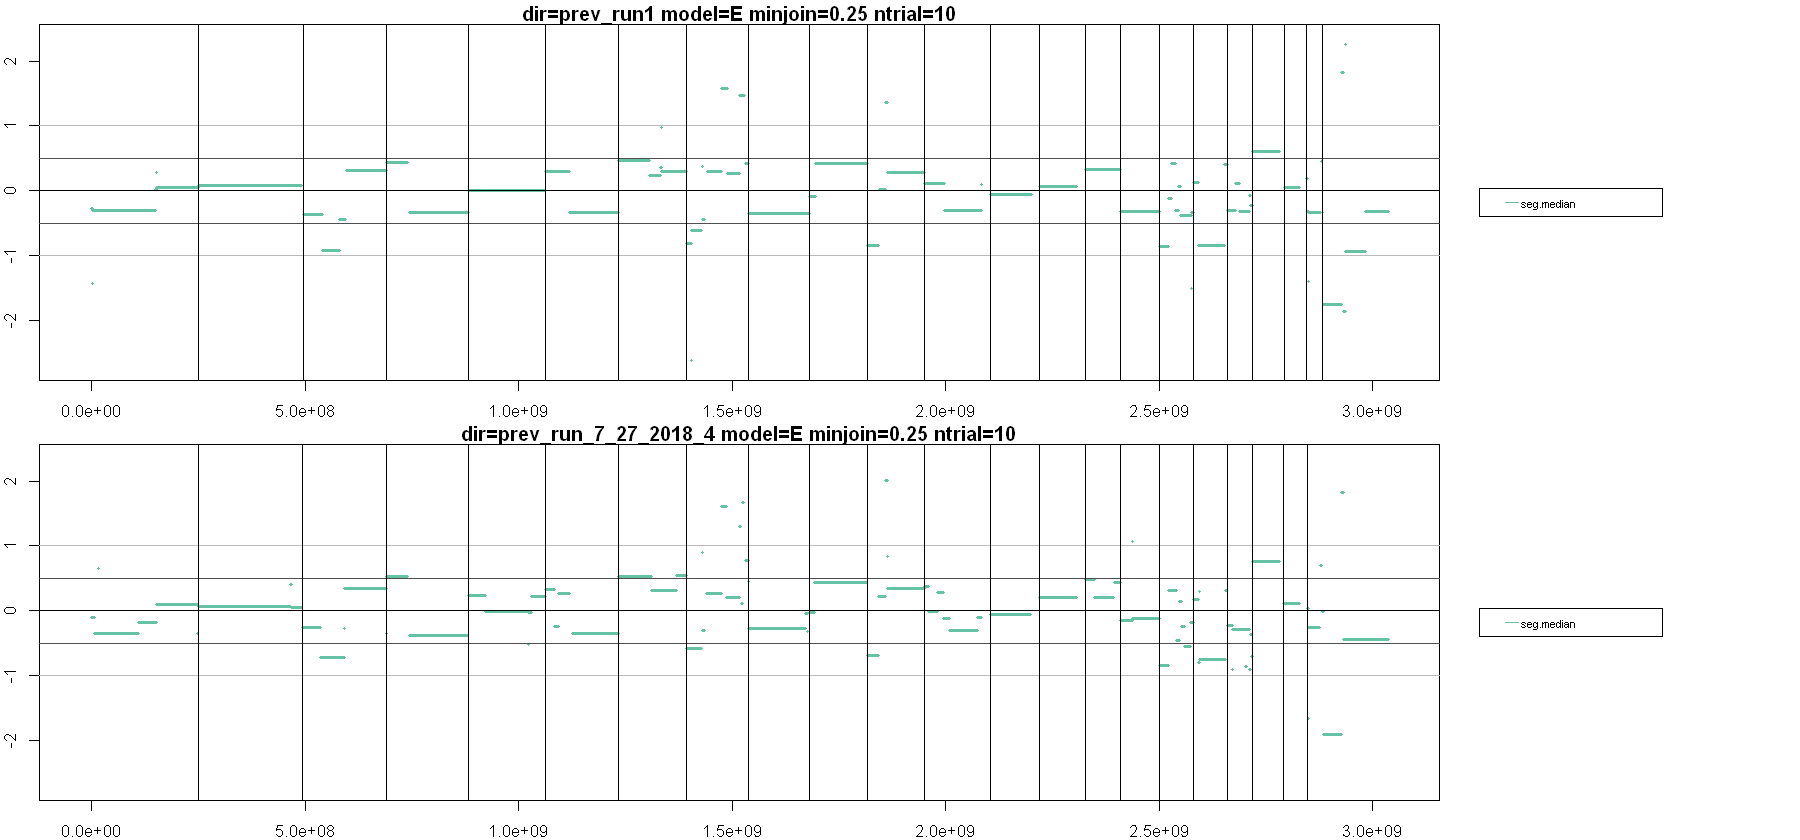

In [10]:
supplementary_values <- c("seg.median")
grid_lines <- TRUE
chrom_lines <- TRUE
bin_coord <- FALSE

displayCNprepResults(organoidId= organoidId, model_specs = all_model_specs[selected_model_specs, ], supplementary_values = c("seg.median"), supplementary_cols =  supplementary_cols, grid_lines = grid_lines, chrom_lines = chrom_lines, bin_coord = bin_coord)

#### Visualize CNprep clusters

Instead of viewing the CNLR segments, we will now view the clustered segments from CNprep color-coded based on cluster assignment.

We do not want to see the seg.median anymore, so we will remove supplementary_values and supplementary_cols arguments.

Instead, we will pass in cluster_value and cluster_col, with cluster_value = "maxzmean". Thereotically, we could of included "maxzmean" to supplementary_values, however supplementary_values does not color-code the segments based on cluster assignment.

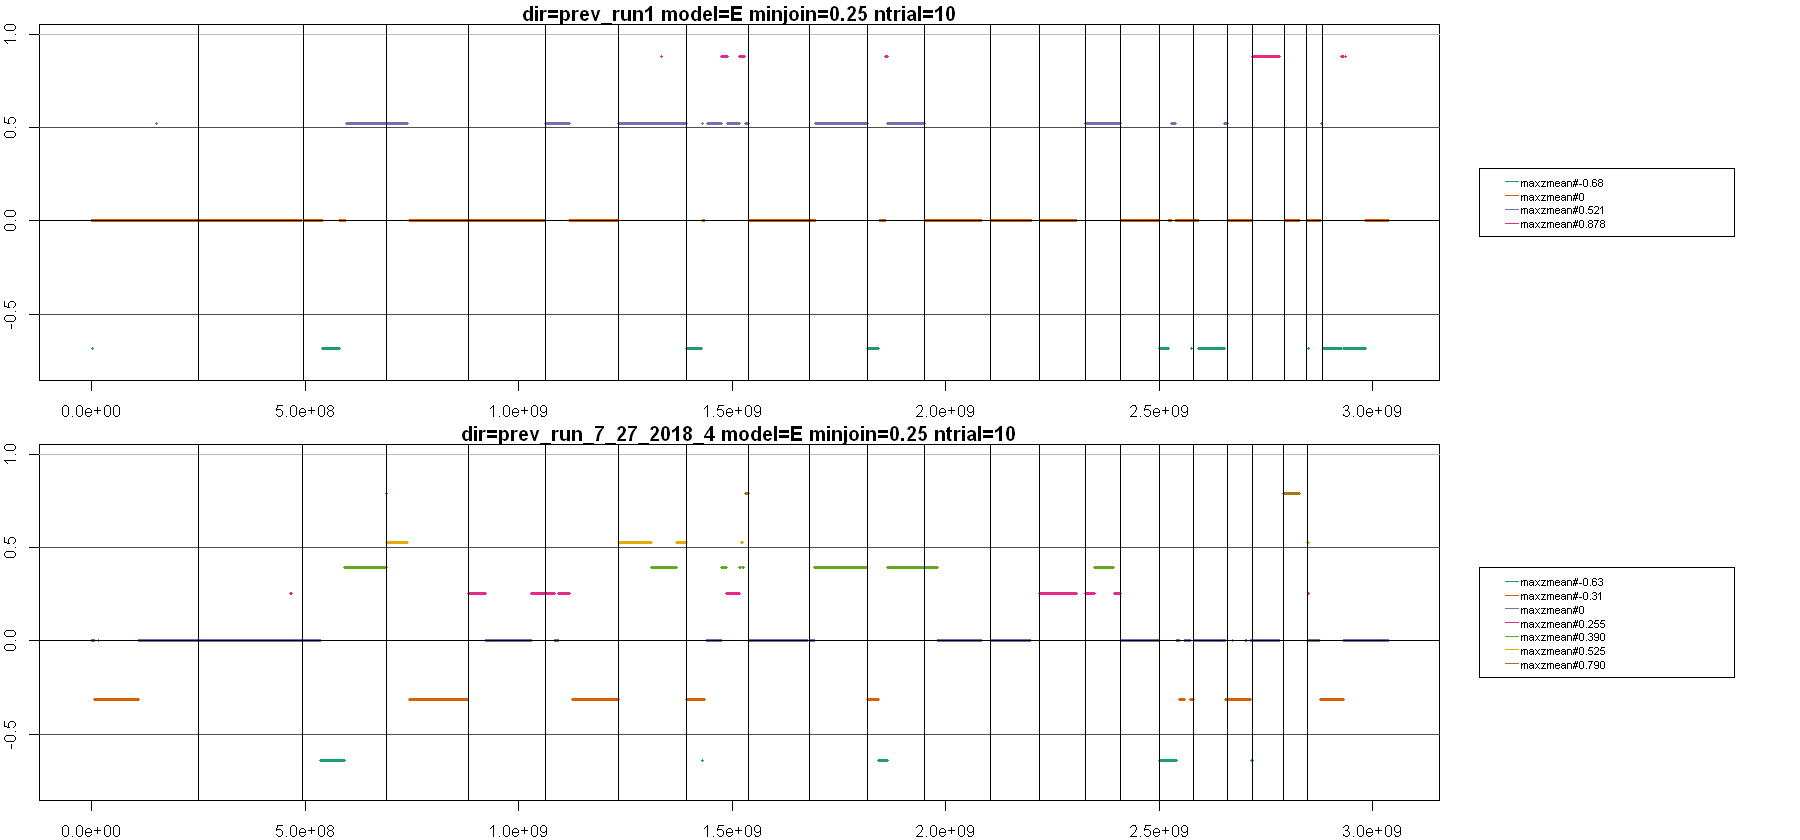

In [11]:
cluster_value = "maxzmean"
grid_lines <- TRUE
chrom_lines <- TRUE
bin_coord <- FALSE

displayCNprepResults(organoidId= organoidId, model_specs = all_model_specs[selected_model_specs, ], cluster_value = cluster_value , cluster_cols = cluster_cols, grid_lines = grid_lines, chrom_lines = chrom_lines, bin_coord = bin_coord)

#### Visualize center CNprofile color-coded based on cluster assignment

To get a better idea of how well the clustering work, we will view the centered CN profile with each segment colored based on their downstream cluster assignment by CNprep.

We have similar arguments as the last time, except now we include two new arguments: clustered_supplementary_value and overlay_cluster_means.

clustered_supplementary_value is a column we want to visualize based on the cluster assignment specified by cluster_value. In this case, we want to view mediandev, although seg.median would be useful to visualize as well.

By default, we would not see the values specified by cluster_value ("maxzmean"), therefore we could not see the cluster mean. If we want to see both the cluster_value and clustered_supplementary_value, we set overlay_cluster_means = TRUE.


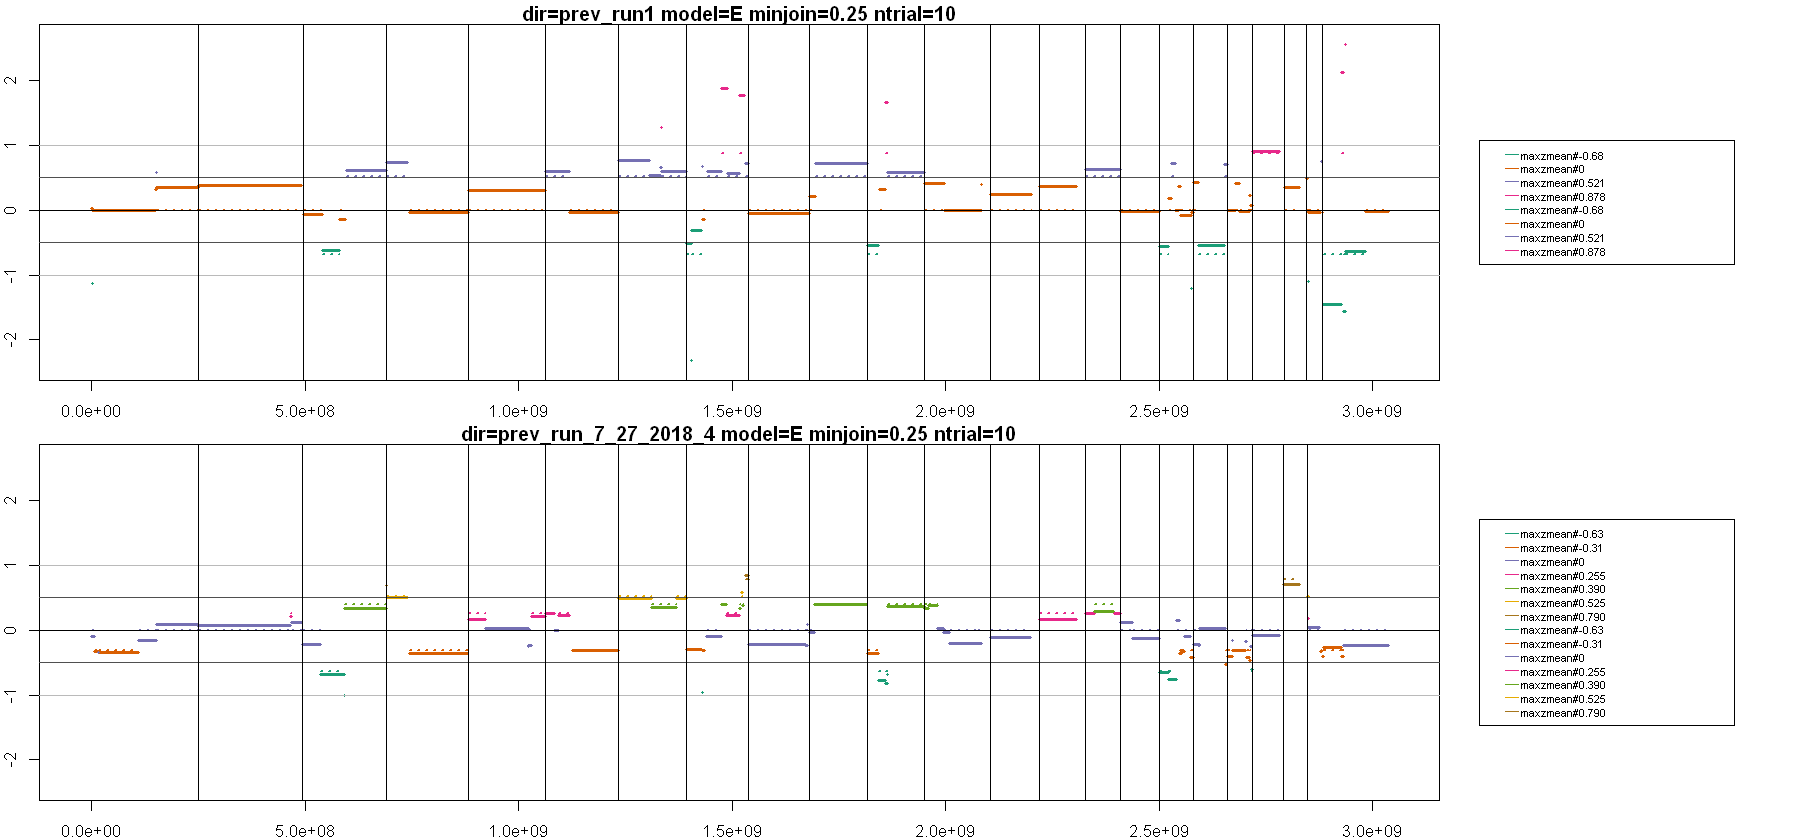

In [12]:
cluster_value = "maxzmean"
clustered_supplementary_value = "mediandev"
overlay_cluster_means = TRUE
grid_lines <- TRUE
chrom_lines <- TRUE
bin_coord <- FALSE

displayCNprepResults(organoidId= organoidId, model_specs = all_model_specs[selected_model_specs, ], cluster_value = cluster_value, clustered_supplementary_value = clustered_supplementary_value, overlay_cluster_means = overlay_cluster_means, cluster_cols = cluster_cols, grid_lines = grid_lines, chrom_lines = chrom_lines, bin_coord = bin_coord)

#### Visualize profile in a specific range

Perhaps we are interested in viewing the segments in a specific x-range. We can include the coordinates in the parameters: start, end.

NOTE: these coordinates should be consistent with the coordinate defined by bin_coord. Specifically if bin_coord = FALSE, the range coordinates should be in absolute BP unites. If bin_coord = TRUE, the range coordinates should be in bin units.

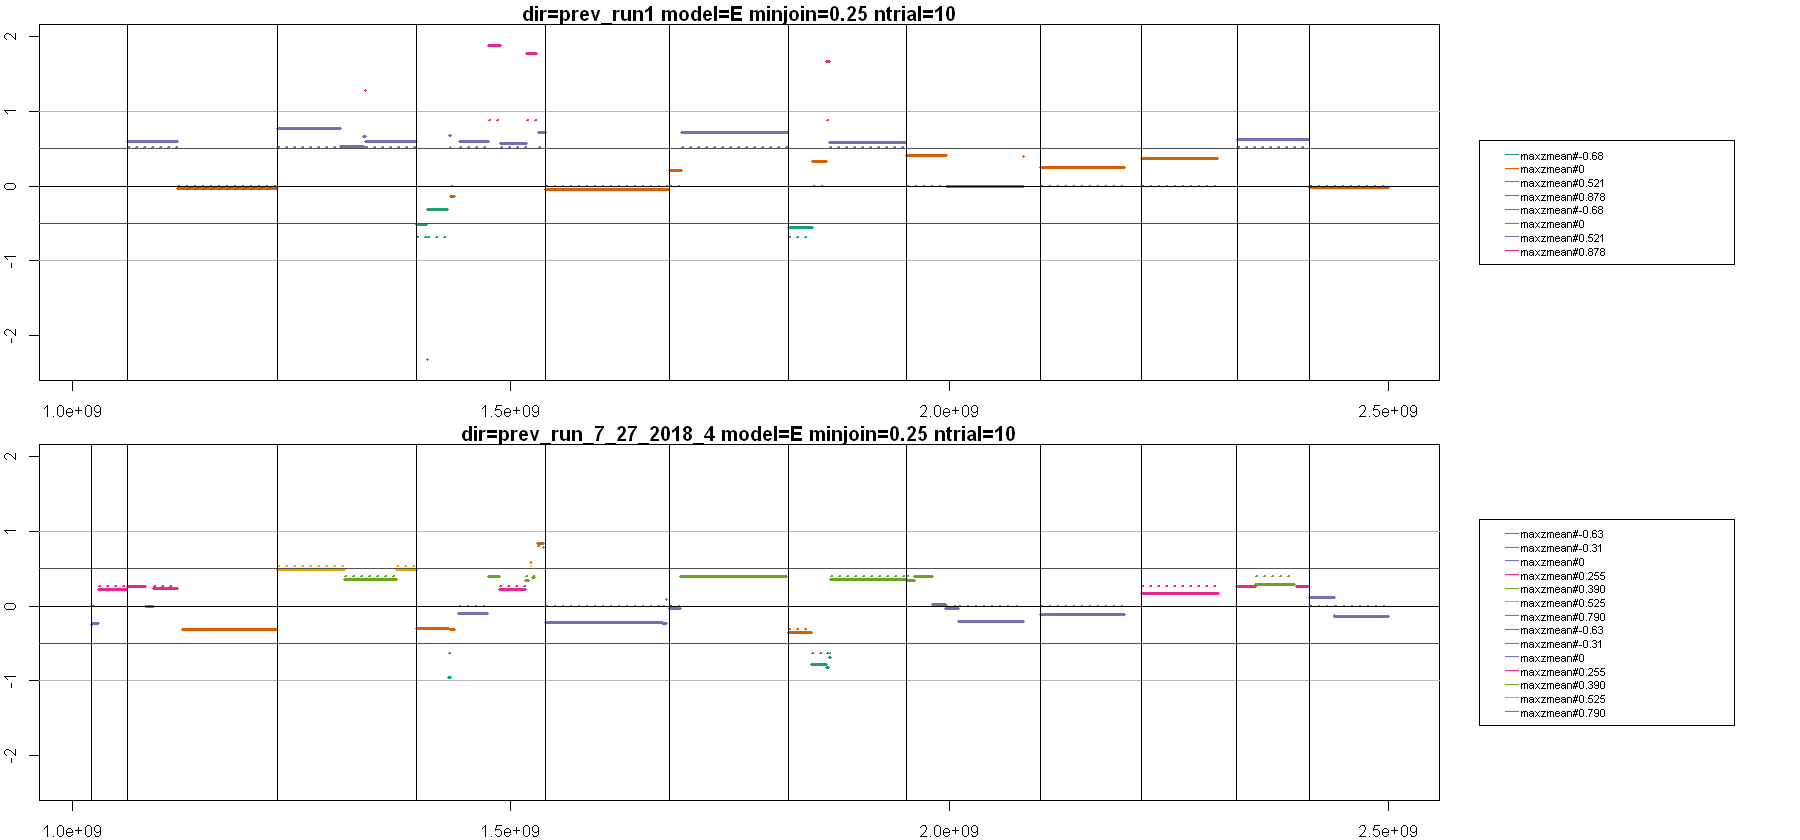

In [16]:
start = 1e9
end = 2.5e9

cluster_value = "maxzmean"
clustered_supplementary_value = "mediandev"
overlay_cluster_means = TRUE
grid_lines <- TRUE
chrom_lines <- TRUE
bin_coord <- FALSE

displayCNprepResults(organoidId= organoidId, start = start, end = end, model_specs = all_model_specs[selected_model_specs, ], cluster_value = cluster_value, clustered_supplementary_value = clustered_supplementary_value, overlay_cluster_means = overlay_cluster_means, cluster_cols = cluster_cols, grid_lines = grid_lines, chrom_lines = chrom_lines, bin_coord = bin_coord)

#### Visualize profile in specific chromosome

Perhaps there is a chromosome of interest we want to visualize in. We can set the chromosome number in the select_chrom parameter. Only 1 chromosome can be selected.

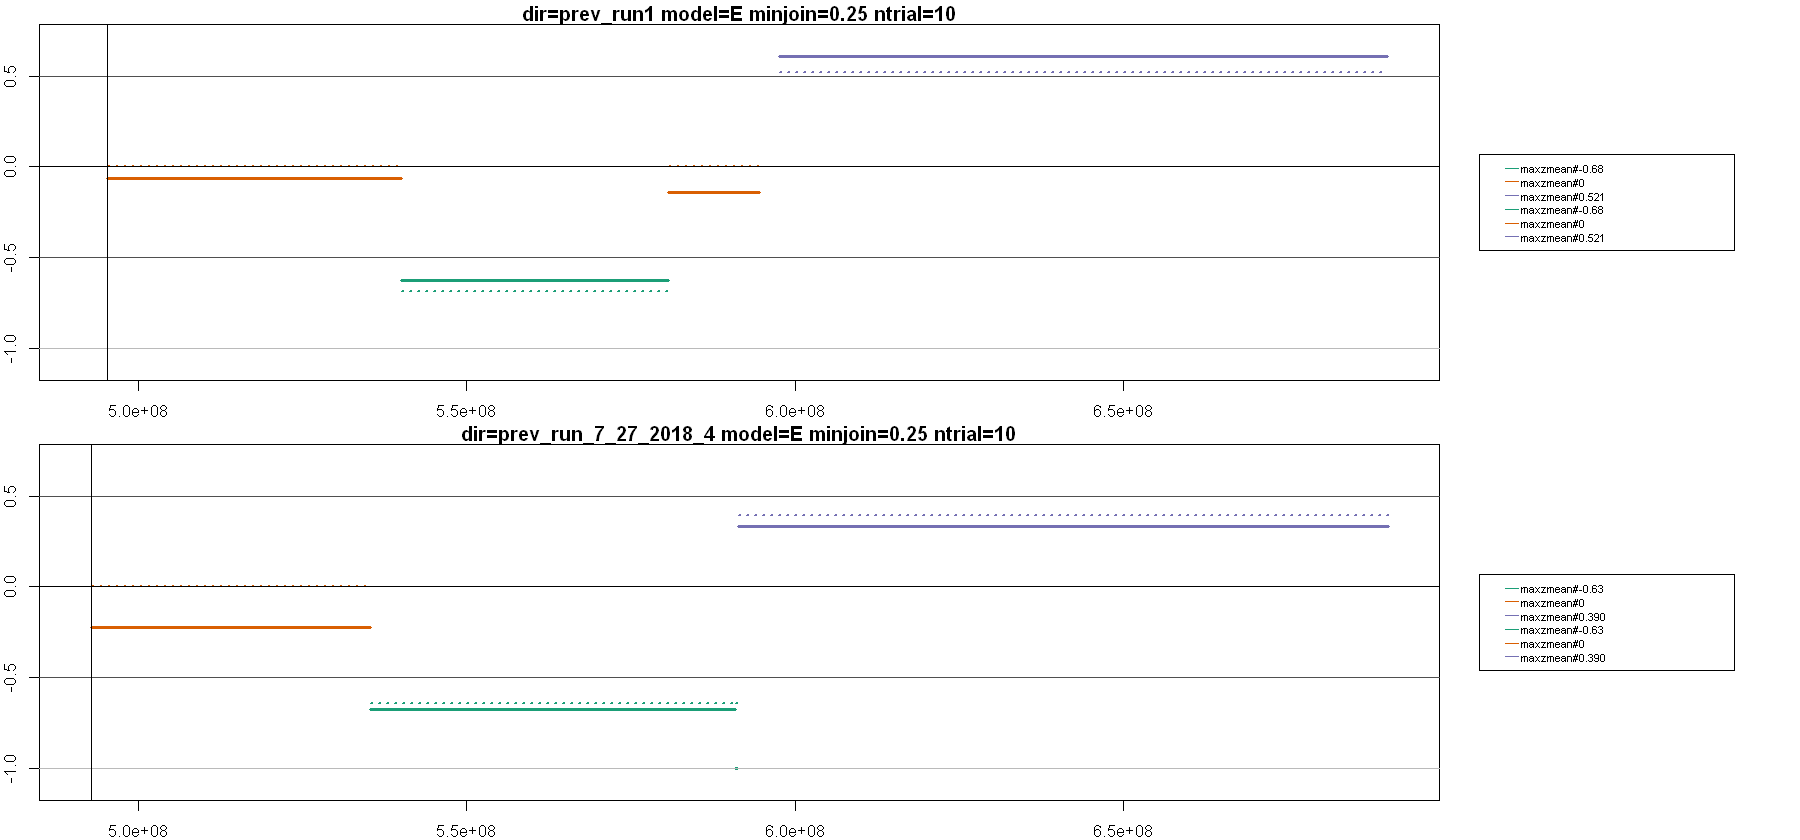

In [17]:
select_chrom = 3

cluster_value = "maxzmean"
clustered_supplementary_value = "mediandev"
overlay_cluster_means = TRUE
grid_lines <- TRUE
chrom_lines <- TRUE
bin_coord <- FALSE

displayCNprepResults(organoidId= organoidId, select_chrom = select_chrom, model_specs = all_model_specs[selected_model_specs, ], cluster_value = cluster_value, clustered_supplementary_value = clustered_supplementary_value, overlay_cluster_means = overlay_cluster_means, cluster_cols = cluster_cols, grid_lines = grid_lines, chrom_lines = chrom_lines, bin_coord = bin_coord)

#### Highlight segments based on condition

We can highlight specific segments based on conditions defined by the user.

##### Create condition functions 

These are the functions we will use to determine the criteria for when a segment should be highlighted. The function must take a segment (single row from CNprep's segtable output) as an input. The function must also return a boolean indicating if the segment is selected.

How the selection works is the visualization function will lapply over all segments with your provided function as the lapply FUN parameter. Then, the color of segments with TRUE status will be highlighted based on user specification.

Below, we have an example function for highlighting seg.medians that FACETs would call, and another for an event that CNprep would call. We will highlight both amplifications and deletions without distinguishing.

In [24]:
highlight_facets_events <- function(segment){
  result <- segment[["seg.median"]] > 0.20 || segment[["seg.median"]] < -0.235
  return(result)
}
highlight_cnprep_events <- function(segment){
  result <- segment[["marginalprob"]]  < 0.001 & segment[["mediandev"]] != 0
  return(result)
}

##### Highlight segmedians that CNprep would call

We will see which segments CNprep would call as a amplification or deletion.

First, we set target_segments_function = highlight_cnprep_events as the condition function which will highlight segments based on CNprep's specification.

Next, we set target_segments_value = "seg.median" to determine which segment column to highlight on the plot.

Next, we set target_segments_col = "maroon" to specify which color the highlighting will be.

Next, we set supplementary_values = c("seg.median") so that we can see the non-highlighted segments as well. Ensure that supplementary_cols and target_segments_col are different colors.

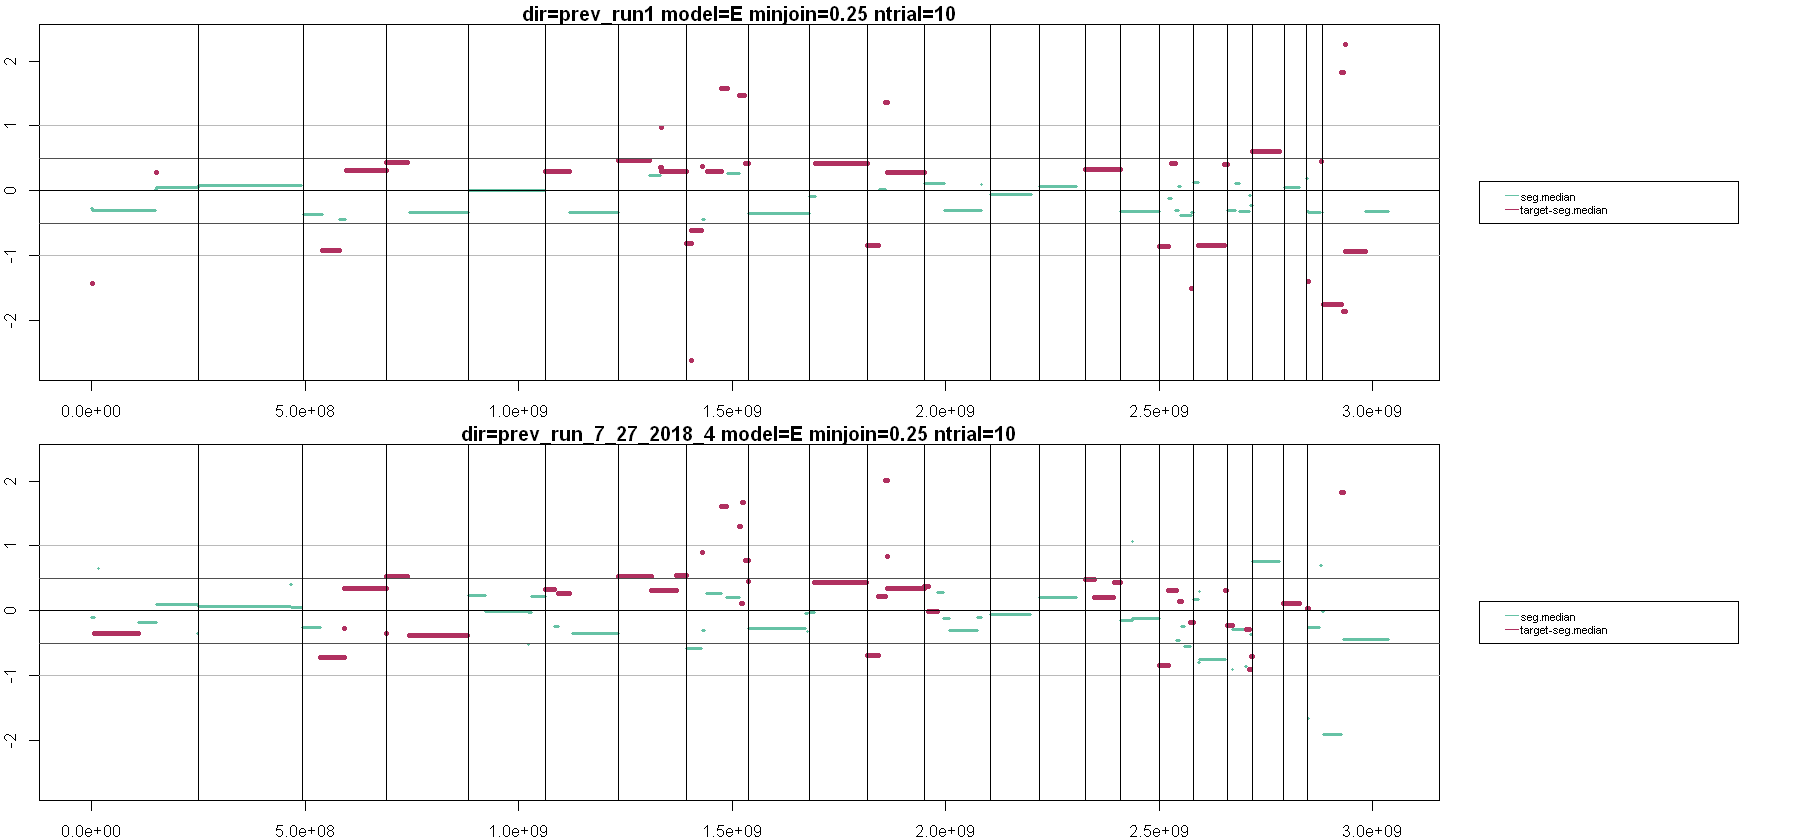

In [29]:
target_segments_function = highlight_cnprep_events
target_segments_value = "seg.median"
target_segments_col = "maroon"
supplementary_values = c("seg.median")

grid_lines <- TRUE
chrom_lines <- TRUE
bin_coord <- FALSE

displayCNprepResults(organoidId= organoidId, model_specs = all_model_specs[selected_model_specs, ], target_segments_function = target_segments_function, target_segments_value = target_segments_value, target_segments_col = target_segments_col, supplementary_values = supplementary_values , supplementary_cols = supplementary_cols, grid_lines = grid_lines, chrom_lines = chrom_lines, bin_coord = bin_coord)

##### Highlight segmedians that FACETS would call

We will see which segments FACETS would call as a amplification or deletion.

The only difference is that for the target_segments_function, we set it equal to highlight_facets_events as the condition function.

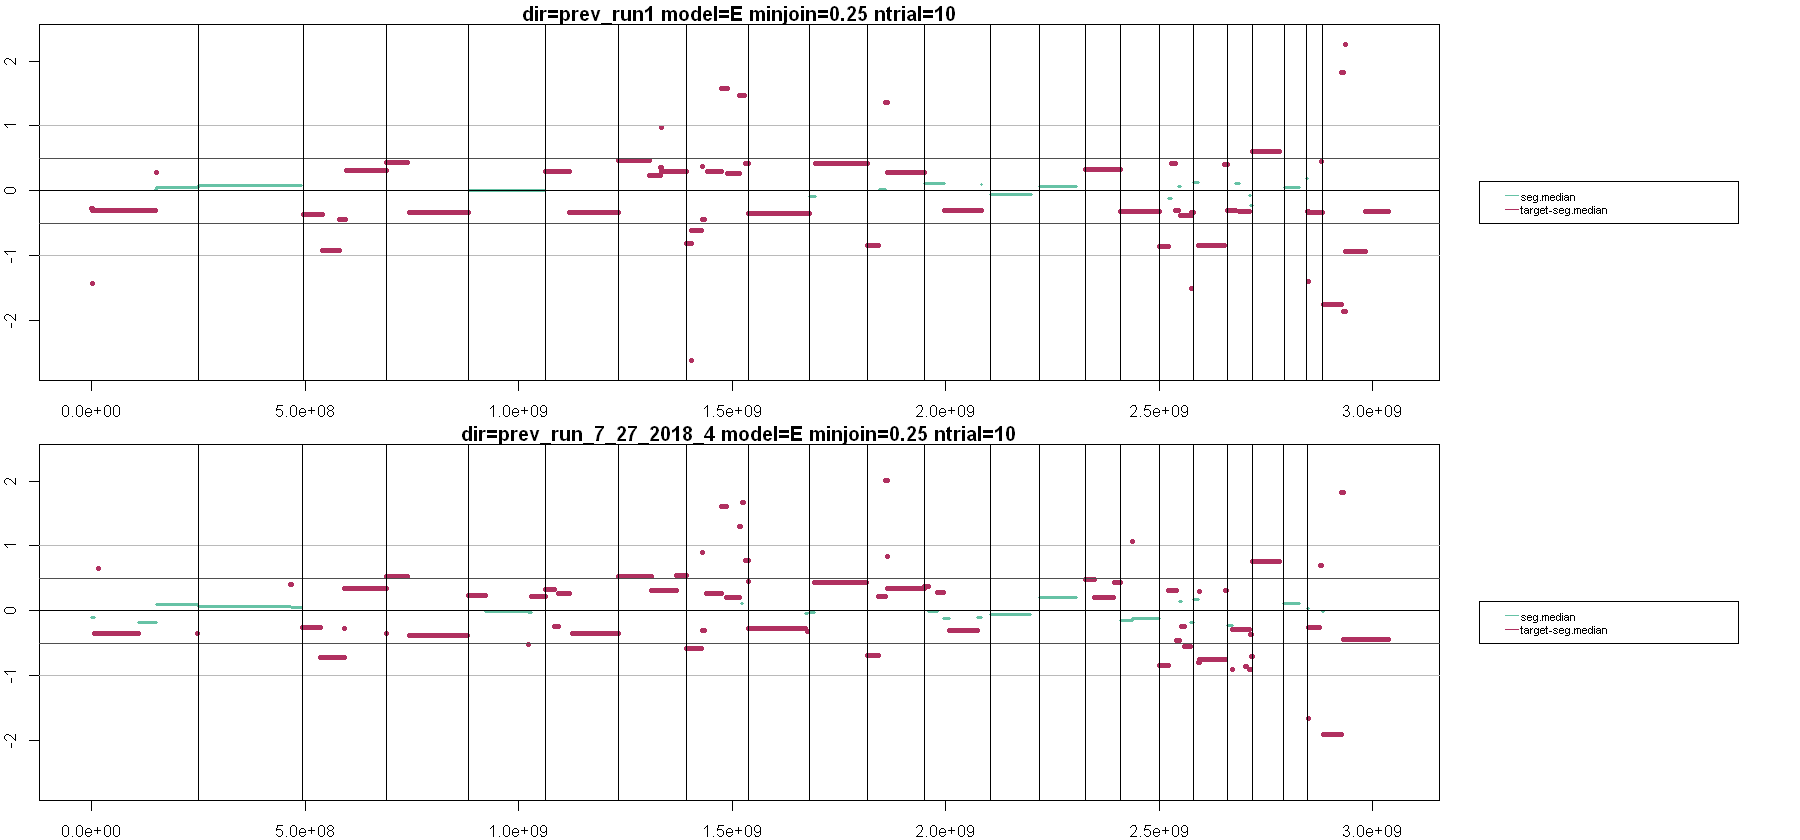

In [30]:
target_segments_function = highlight_facets_events
target_segments_value = "seg.median"
target_segments_col = "maroon"
supplementary_values = c("seg.median")

grid_lines <- TRUE
chrom_lines <- TRUE
bin_coord <- FALSE

displayCNprepResults(organoidId= organoidId, model_specs = all_model_specs[selected_model_specs, ], target_segments_function = target_segments_function, target_segments_value = target_segments_value, target_segments_col = target_segments_col, supplementary_values = supplementary_values , supplementary_cols = supplementary_cols, grid_lines = grid_lines, chrom_lines = chrom_lines, bin_coord = bin_coord)